# Predicting Customer Responses to Phone Marketing Campaign

## Business Problem:
The data is related with direct marketing campaigns of a European banking institution. The marketing campaigns were based on phone calls. The goal is to help this banking institution determine, in advance, clients who will be receptive to such marketing campaigns. We will predict if the customer will subscribe yes(1) or no(0)  to a term deposit (y).


#### Methodology
* Load data from dataset and perform basic analysis: verify number of rows, identify missing values, check the distribution of Dependent variables to the campaign outcome response.
* Data Cleaning : drop irrelevant columns, check for null/missing values, turn categorical columns into numeric using One hot encoding
* Exploratory Data Analysis:Identify patterns in the numeric and categorical columns with respect to response variable y
* Feature Selection: I have used SelectKBest, RFE & ExtraTreesClassifier Methods to determine the relevant variables affecting the campaign.
* Use machine learning algorithm to predict the marketing campaign outcome and to find out factors, which affect the success of the campaign. I have used Logistic Regression & Random Forest Approach for Modeling

Load the Necessary Libraries

In [262]:
#import libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, classification_report, precision_recall_curve, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [146]:
#Read the data
data = pd.read_csv("DSAdataset.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [147]:
#data summary
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   job              41188 non-null  object 
 2   marital          41188 non-null  object 
 3   education        41188 non-null  object 
 4   default          41188 non-null  object 
 5   housing          41188 non-null  object 
 6   loan             41188 non-null  object 
 7   contact          41188 non-null  object 
 8   month            41188 non-null  object 
 9   day_of_week      41188 non-null  object 
 10  duration         41188 non-null  int64  
 11  campaign         41188 non-null  int64  
 12  pdays            41188 non-null  int64  
 13  previous         41188 non-null  int64  
 14  poutcome         41188 non-null  object 
 15  emp.var.rate     41188 non-null  float64
 16  cons.price.idx   41188 non-null  float64
 17  cons.conf.id

In [44]:
data.shape

(41188, 22)

Given dataset has 41188 records and 22 variables containing numberic & categorical data with y being the response or dependent Variable

## Data Cleaning

In [148]:
#Stats of the numeric columns
#data.describe(include='all')

data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [149]:
#Drop the column model prediction
data = data.drop(['ModelPrediction'],axis=1)

In [150]:
#Check if there are any null/ missing values in the columns
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Dataset has no null values

In [151]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [152]:
#Count of y repsonse
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [154]:
#Replace result(y) column  yes=1 no=0
data.replace({'y': {'yes':1,'no':0}},inplace=True)

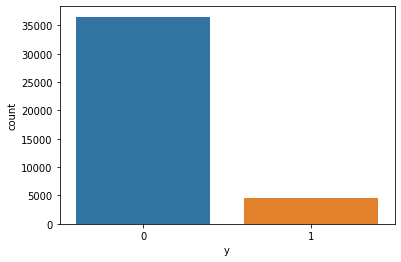

In [155]:
sns.countplot(x='y', data=data)

In [156]:

# percent of y responses
(data['y'].value_counts()/data['y'].count())*100

0    88.734583
1    11.265417
Name: y, dtype: float64

88% of customers said no 11% of customers said yes to the campaign

In [157]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


### Exploratory Data Analysis

#### Categorical: Job Distribution

In [161]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [164]:
#Jobs vs y 
pd.crosstab(data.job,data.y)

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


Text(0, 0.5, 'Count')

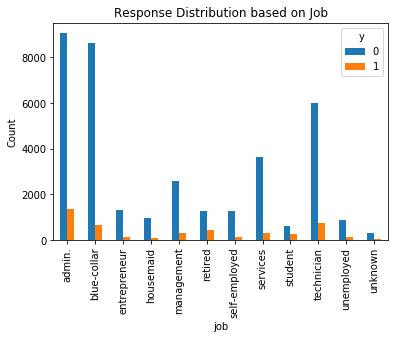

In [537]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Response Distribution based on Job')
plt.xlabel('job')
plt.ylabel('Count')

Customers who have admin jobs have the highest yes rate of subscribing a term deposit, but they also have the highest no rate, since count of admin jobs are highest in our dataset. Blue collar & technician jobs also seem to have a high rate

#### Categorical: Marital Status

In [206]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Text(0, 0.5, 'Count')

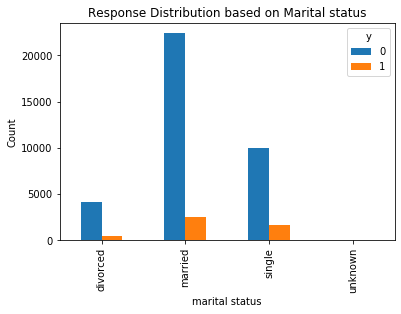

In [165]:
# create cross tabs by marital with response y
pd.crosstab(data.marital,data.y).plot(kind='bar')
plt.title('Response Distribution based on Marital status')
plt.xlabel('marital status')
plt.ylabel('Count')

Married customers seem to be more responsive to the campaign

#### Categorical: Education Distribution

In [166]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

To simplify the Education column I have grouped Education into Primary_Ed, HighSchool, University, Professional Course & Unknown. Have added basic.4y,basic.6y,basic,9y in the primary category & since illetrate is only 18 I have added it in the Primary_Ed category as well

In [167]:
data.replace({'education' : { 'basic.9y' : 'Primary_Ed', 'basic.4y' : 'Primary_Ed','basic.6y' : 'Primary_Ed','illiterate' : 'Primary_Ed',
                             'high.school' : 'High_School', 'university.degree' : 'University' }}, inplace=True)

In [168]:
data['education'].value_counts()

Primary_Ed             12531
University             12168
High_School             9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

Text(0, 0.5, 'Count')

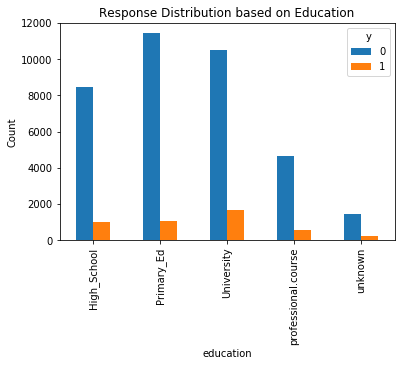

In [169]:
# create cross tabs by education with response y
pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Response Distribution based on Education')
plt.xlabel('education')
plt.ylabel('Count')

University level education has the highest yes rate of subscribing a term deposit, also primary education seems to have the highest No rate, it could possibly be due to the lack of banking knowledge in the younger age group

#### Categorical: Credit Default

In [66]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

Text(0, 0.5, 'Count')

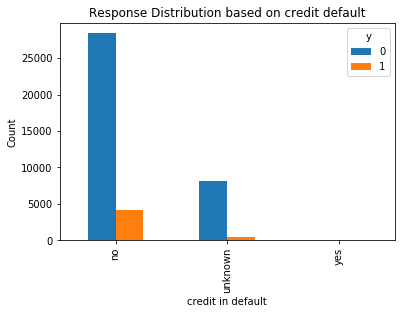

In [171]:
# create cross tabs by education with response y
pd.crosstab(data.default,data.y).plot(kind='bar')
plt.title('Response Distribution based on credit default')
plt.xlabel('credit in default')
plt.ylabel('Count')

#### Categorical: Housing loan

In [173]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

Text(0, 0.5, 'Count')

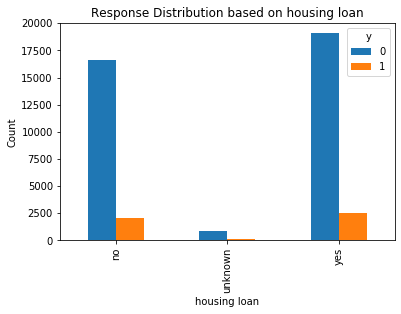

In [174]:
# create cross tabs by education with response y
pd.crosstab(data.housing,data.y).plot(kind='bar')
plt.title('Response Distribution based on housing loan')
plt.xlabel('housing loan')
plt.ylabel('Count')

#### Categorical: Personal loan distribution

In [175]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

Text(0, 0.5, 'Count')

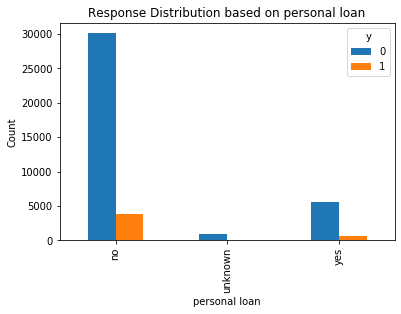

In [176]:
# create cross tabs by education with response y
pd.crosstab(data.loan,data.y).plot(kind='bar')
plt.title('Response Distribution based on personal loan')
plt.xlabel('personal loan')
plt.ylabel('Count')

Majority customers are new clients who were not from the past campaigns

Count plot of redit default, Housing loan & personal loan distribution in the dataset

Text(0, 0.5, 'Count')

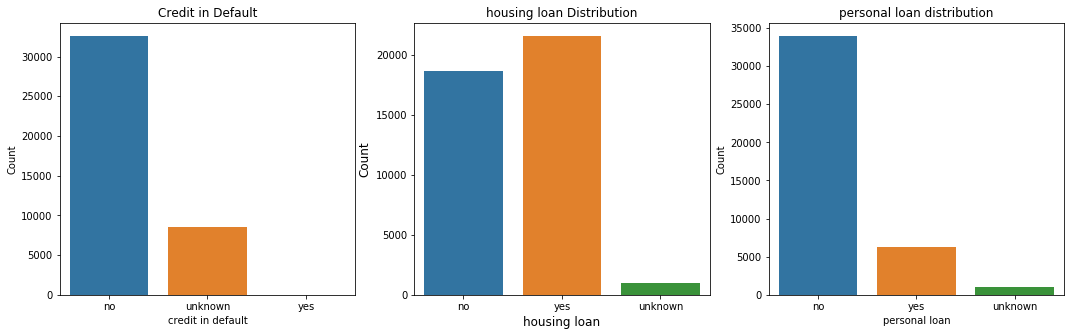

In [64]:
# Credit default, Housing loan & personal loan distribution in the dataset. 
fig, (df, hs,ln) = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))

#Count plot of credit default status
sns.countplot(x = "default", data = data, ax = df)
df.set_title("Credit in Default")
df.set_xlabel("credit in default")
df.set_ylabel("Count")

#Count plot of housing loan distribution
sns.countplot(x='housing',data=data, ax=hs)
hs.set_xlabel('housing loan',size=12)
hs.set_ylabel('Count',size=12)
hs.set_title('housing loan Distribution')

#Count plot of personal loan distribution
sns.countplot(x = "loan", data = data, ax = ln)
ln.set_title("personal loan distribution")
ln.set_xlabel("personal loan")
ln.set_ylabel("Count")



#### Categorical: Contact

Text(0, 0.5, 'Count')

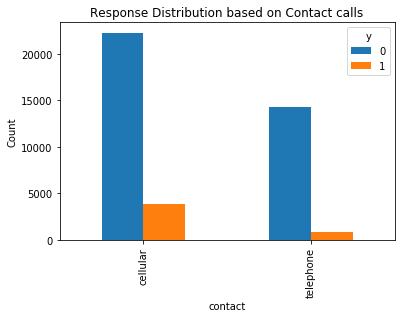

In [228]:
# create cross tabs by education with response y
pd.crosstab(data.contact,data.y).plot(kind='bar')
plt.title('Response Distribution based on Contact calls')
plt.xlabel('contact')
plt.ylabel('Count')

* Cellular calls seem to have a higher response rate than telephones

#### Categorical: Month

Text(0, 0.5, 'Count')

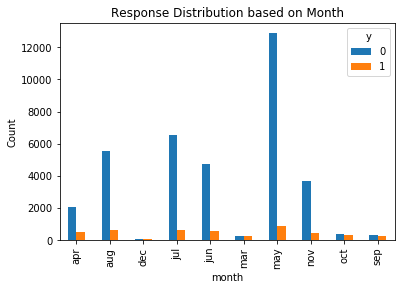

In [536]:
# create cross tabs by month with response y
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Response Distribution based on Month')
plt.xlabel('month')
plt.ylabel('Count')

#### Categorical: Day of the Week

In [224]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

Text(0, 0.5, 'Count')

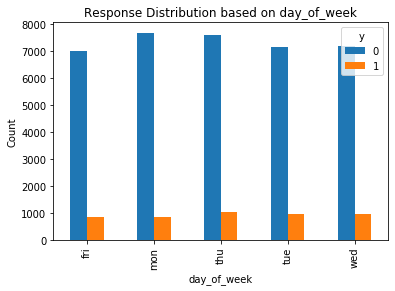

In [225]:
# create cross tabs by month with response y
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Response Distribution based on day_of_week')
plt.xlabel('day_of_week')
plt.ylabel('Count')

Day of week may not be a good predictor of the outcome.

Poutcome

In [226]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

Text(0, 0.5, 'Count')

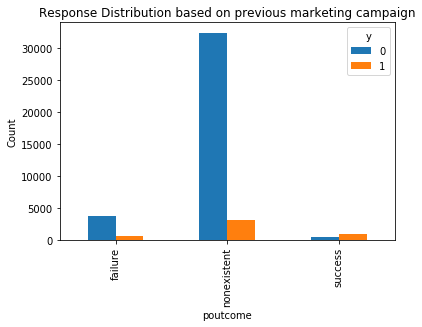

In [227]:
# create cross tabs by education with response y
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Response Distribution based on previous marketing campaign')
plt.xlabel('poutcome')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

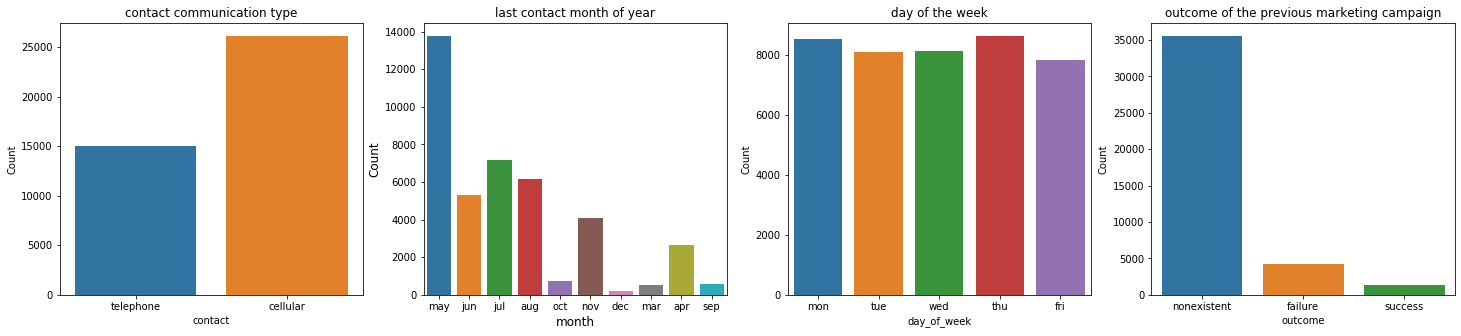

In [72]:
# Contact, month ,day_of_week,poutcome distribution in the dataset. 
fig, (ct, mn, day, pt) = plt.subplots(nrows = 1, ncols = 4, figsize = (25, 5))

#Count plot of Contact calls
sns.countplot(x = "contact", data = data, ax = ct)
ct.set_title("contact communication type")
ct.set_xlabel("contact")
ct.set_ylabel("Count")

#Count plot of month distribution
sns.countplot(x='month',data=data, ax=mn)
mn.set_xlabel('month',size=12)
mn.set_ylabel('Count',size=12)
mn.set_title('last contact month of year')

#Count plot of day_of_week distribution
sns.countplot(x = "day_of_week", data = data, ax = day)
day.set_title("day of the week")
day.set_xlabel("day_of_week")
day.set_ylabel("Count")


#Count plot of poutcome status
sns.countplot(x = "poutcome", data = data, ax = pt)
pt.set_title("outcome of the previous marketing campaign")
pt.set_xlabel("outcome")
pt.set_ylabel("Count")




## Age(Numeric)
Age Distribution : Customers range from 17-98 years, majority of them lie in the 30-50 age category, distribution is fairly normal


Text(0.5, 1.0, 'Age distribution')

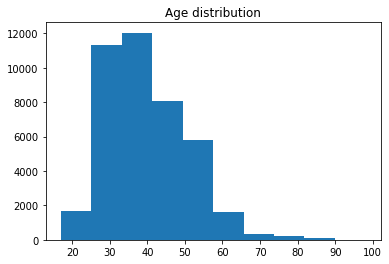

In [179]:
#Histogram for age distribution
plt.hist(data['age'])
plt.title("Age distribution")


Plotting Histogram to view the numeric columns : age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, ModelPrediction, y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe704821190>,
      dtype=object)

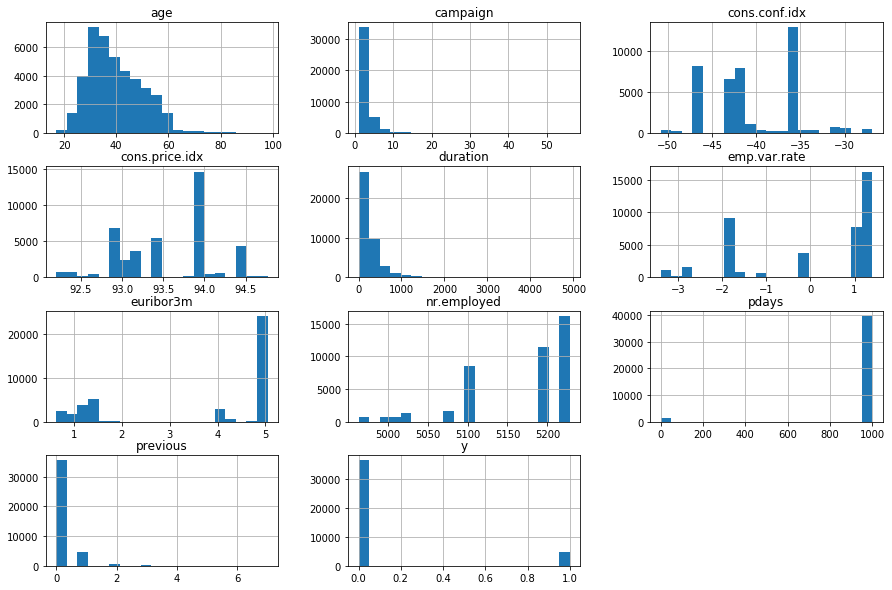

In [180]:
#Histogram of the numerical fields
data.hist(bins=20, figsize=(15, 10))

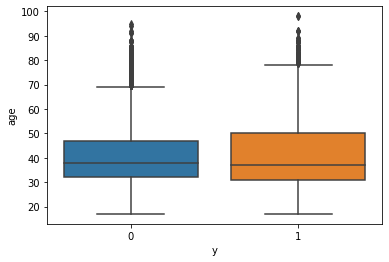

In [181]:
sns.boxplot(data=data, x="y", y="age")
plt.show()

customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40

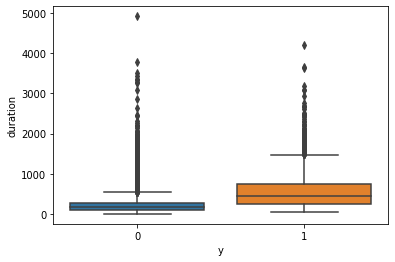

In [202]:
sns.boxplot(data=data, x="y", y="duration")
plt.show()

The duration is expected to affect the target variable, it is already mentioned in the data overview that this field highely affects the target variable. 

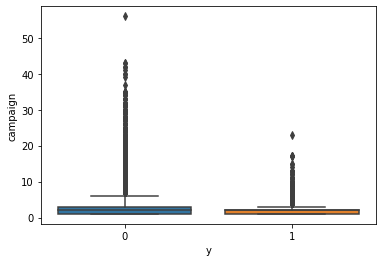

In [203]:
sns.boxplot(data=data, x="y", y="campaign")
plt.show()

In [197]:
print(data['pdays'].value_counts())
# percent of pday responses
print(data['pdays'].value_counts()/data['pdays'].count()*100)

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64
999    96.321744
3       1.065844
6       1.000291
4       0.286491
9       0.155385
2       0.148101
7       0.145673
12      0.140818
10      0.126250
5       0.111683
13      0.087404
11      0.067981
1       0.063125
15      0.058269
14      0.048558
8       0.043702
0       0.036418
16      0.026707
17      0.019423
18      0.016995
19      0.007284
22      0.007284
21      0.004856
26      0.002428
20      0.002428
25      0.002428
27      0.002428
Name: pdays, dtype: float64


Nearly 96% of the clients (39673) were not previously contacted

In [186]:
data[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,41188.000000,41188.000000,41188.000000
mean,962.475454,2.567593,0.172963
std,186.910907,2.770014,0.494901
min,0.000000,1.000000,0.000000
25%,999.000000,1.000000,0.000000
50%,999.000000,2.000000,0.000000
75%,999.000000,3.000000,0.000000
max,999.000000,56.000000,7.000000


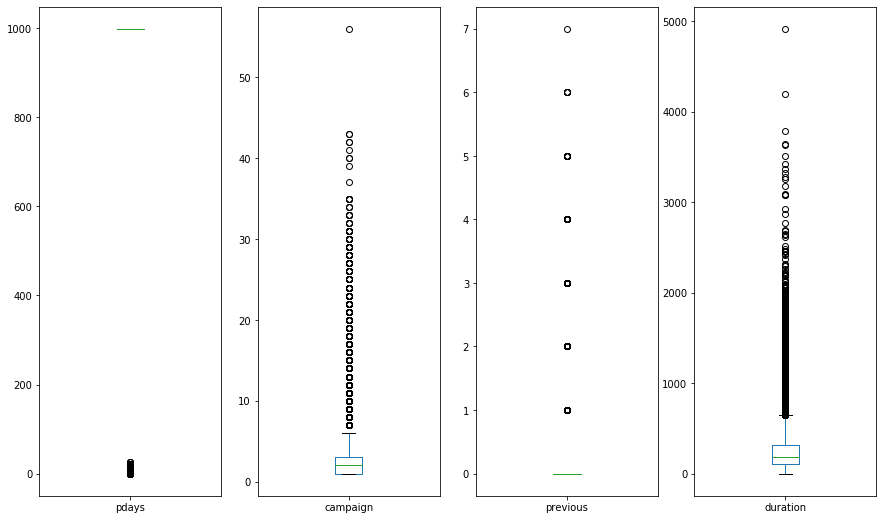

In [187]:
data[['pdays', 'campaign','previous','duration']].plot(kind = 'box', figsize = (15,9),subplots = True, layout = (1,4))
plt.show()

### relationship between duration & campaign

Text(0.5, 1.0, 'The Relationship between the Number and Duration of Calls with Response y')

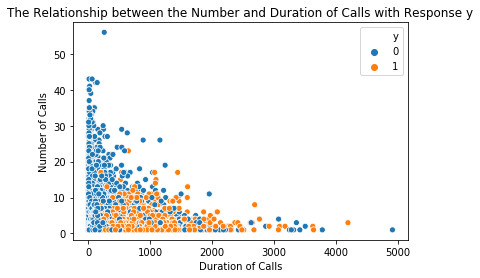

In [192]:
sns.scatterplot(x='duration', y='campaign',data = data,hue = 'y')
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls')
plt.title('The Relationship between the Number and Duration of Calls with Response y')

Clients who were contacted lesser no. of times and had longer call duration,have a yes response however, after approx 6 campaign calls, clients seem to reject the term deposit unless the call duration is longer.
Possible suggestion could be tha the bank should avoid calling clients more than 6 times as it could lead to customer dissatisfaction. 



## Correlation matrix of numerical features

In [210]:
#correlation matrix between numeric columns 
#Drop the column model prediction
data1 = data.drop(['y'],axis=1)

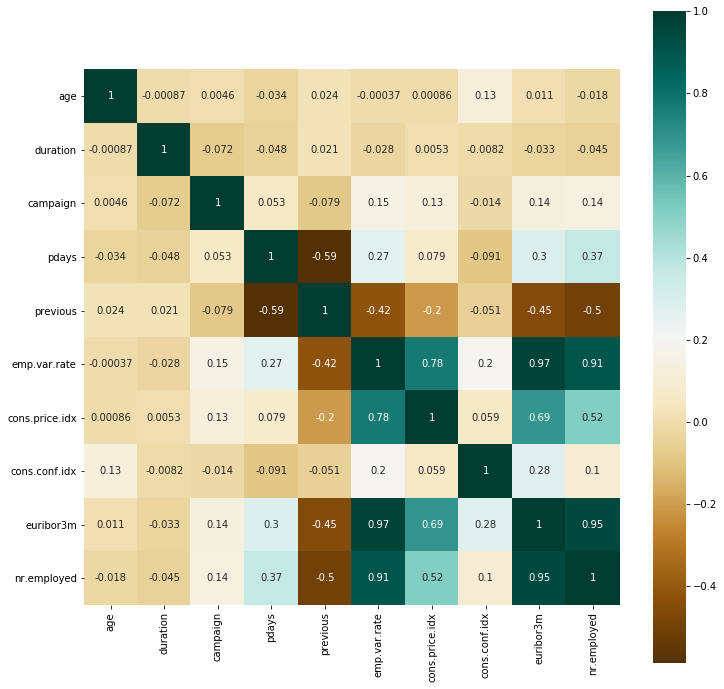

In [194]:
#correlation matrix between numeric columns 
plt.figure(figsize=(12,12))
sns.heatmap(data1.corr(),square=True,annot=True,cmap= 'BrBG')

From the above heatmap we can see that there are some numerical features with a high correlation , e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.

## Data Processing 

In [369]:
#Fields with Numerical & Categorical Columns
col = data.columns
num_col= data._get_numeric_data().columns #numeric columns
cat_col = list(set(col) - set(num_col)) #categorical columns

In [370]:
cat_col

['job',
 'loan',
 'housing',
 'poutcome',
 'contact',
 'marital',
 'education',
 'day_of_week',
 'month',
 'default']

## Convert Categorical columns to numeric using One Hot Encoder method
I have used the dummy value approach since the categorical variables have no rank/order and it allows encoding many category columns(default, contact,day_of_week, poutcome, month,housing, job,loan, marital,education)

In [220]:
# generate binary values using get_dummies
# drop_first allows to drop your first variable and identify it through all other columns being 0.
# prefix is for naming the new columns

#10 categorical parameters

job= pd.get_dummies(data['job'],drop_first= True,prefix='job')
loan= pd.get_dummies(data['loan'],drop_first= True,prefix='loan')
hous= pd.get_dummies(data['housing'],drop_first= True,prefix='housing')
p= pd.get_dummies(data['poutcome'],drop_first= True,prefix='poutcome')
contact= pd.get_dummies(data['contact'],drop_first= True,prefix='contact')
m= pd.get_dummies(data['marital'],drop_first= True,prefix='marital')
edu= pd.get_dummies(data['education'],drop_first= True,prefix='education')
day= pd.get_dummies(data['day_of_week'],drop_first= True,prefix='day_of_week')
month= pd.get_dummies(data['month'],drop_first= True,prefix='month')
default= pd.get_dummies(data['default'],drop_first= True,prefix='default')


In [222]:
#Concatenate along columns
encod= pd.concat([job,loan,hous,p,contact,m,edu,day,month,default],axis=1)
encod

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success,contact_telephone,marital_married,marital_single,marital_unknown,education_Primary_Ed,education_University,education_professional.course,education_unknown,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_unknown,default_yes
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41184,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41185,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41186,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [229]:
#Join numerical columns with categorical encoded columns
new_data = data[num_col].join(encod)
new_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success,contact_telephone,marital_married,marital_single,marital_unknown,education_Primary_Ed,education_University,education_professional.course,education_unknown,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_unknown,default_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [466]:
#testing data without duration 
new_data = new_data.drop(['duration'],axis=1)
new_data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success,contact_telephone,marital_married,marital_single,marital_unknown,education_Primary_Ed,education_University,education_professional.course,education_unknown,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_unknown,default_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Feature Selection

In [467]:
#new data columns
new_data.columns.values

array(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'loan_unknown', 'loan_yes', 'housing_unknown',
       'housing_yes', 'poutcome_nonexistent', 'poutcome_success',
       'contact_telephone', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Primary_Ed', 'education_University',
       'education_professional.course', 'education_unknown',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'default_unknown', 'default_yes'], dtype=object)

In [468]:
# separate inpedendent and dependent variables
x = new_data.loc[:, new_data.columns != 'y'] # dependent variable
y = new_data.loc[:, new_data.columns == 'y'] # independent variable
x.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_unknown,loan_yes,housing_unknown,housing_yes,poutcome_nonexistent,poutcome_success,contact_telephone,marital_married,marital_single,marital_unknown,education_Primary_Ed,education_University,education_professional.course,education_unknown,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,default_unknown,default_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Feature Selection Using SelectKBest
Scikit-learn API provides SelectKBest class for extracting best features of given dataset. The SelectKBest method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the 'chi2'  method as a scoring function for both classification of data. Selecting best features is important process when we prepare a large dataset for training. It helps us to eliminate less important part of the data and reduce a training time

In [469]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

## Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select [here it's all]
fs = SelectKBest(score_func=f_regression , k='all')

fs.fit_transform(x, y)

df_fs = pd.DataFrame(list(zip(fs.scores_, x.columns)),columns =['Score', 'Feature'])

df_fs=  df_fs.sort_values(by=['Score'],ascending=False)
df_fs

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Score,Feature
8,5926.610651,nr.employed
2,4861.173272,pdays
25,4577.560712,poutcome_success
7,4309.479048,euribor3m
4,4023.829925,emp.var.rate
3,2304.257088,previous
24,1602.199832,poutcome_nonexistent
26,881.707070,contact_telephone
42,872.290501,month_mar
45,792.101543,month_oct


## Feature selection using RFE (Recursive Feature Elimination)

In [470]:
data_final_vars = new_data.columns.values.tolist()


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)


fit = rfe.fit(x,y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

df = pd.DataFrame(list(zip(fit.ranking_, x.columns)),columns =['Rank', 'Feature'])
df.sort_values(by = 'Rank')


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED 

Num Features: 20
Selected Features: [False False False  True False False False  True False  True False False
 False  True False  True  True False False False False False False False
  True  True  True False False False False False False  True  True False
 False  True  True  True  True  True  True  True False  True False  True
 False]
Feature Ranking: [17  5 22  1  6 10  8  1 15  1 18 20 24  1 29  1  1 11 23 25 26 19 27 21
  1  1  1  9 12 28 14  2 13  1  1  4  3  1  1  1  1  1  1  1  7  1 16  1
 30]


,Rank,Feature
24,1,poutcome_nonexistent
26,1,contact_telephone
25,1,poutcome_success
47,1,default_unknown
37,1,day_of_week_wed
38,1,month_aug
39,1,month_dec
40,1,month_jul
41,1,month_jun
33,1,education_unknown


The RFE has helped us select the following features: 'poutcome_nonexistent','contact_telephone','poutcome_success','default_unknown','day_of_week_wed','month_aug','month_dec', 'month_jul', 'month_jun','education_unknown','job_student', 'job_services','month_mar','day_of_week_mon','job_retired','euribor3m','previous','job_blue-collar'

In [476]:
print(fit.support_)
print(fit.ranking_)

[False False False  True False False False  True False  True False False
 False  True False  True  True False False False False False False False
  True  True  True False False False False False False  True  True False
 False  True  True  True  True  True  True  True False  True False  True
 False]
[17  5 22  1  6 10  8  1 15  1 18 20 24  1 29  1  1 11 23 25 26 19 27 21
  1  1  1  9 12 28 14  2 13  1  1  4  3  1  1  1  1  1  1  1  7  1 16  1
 30]


The RFE has helped us select the following features: 'month_may','poutcome_nonexistent','default_unknown','month_dec', 'month_jul', 'month_jun','job_student', 'job_services','month_mar', 'job_retired', 'poutcome_success','contact_telephone','job_blue-collar','month_aug', 'euribor3m', 'education_unknown','day_of_week_mon', 'previous', 'month_oct', 'month_sep'


In [484]:
cols= ['month_may','poutcome_nonexistent','default_unknown','month_dec', 
       'month_jul', 'month_jun','job_student', 'job_services','month_mar', 'job_retired', 
       'poutcome_success','contact_telephone','job_blue-collar','month_aug',
       'euribor3m', 'education_unknown','day_of_week_mon', 'previous', 'month_oct', 'month_sep']

In [485]:
X= x[cols]
X

,month_may,poutcome_nonexistent,default_unknown,month_dec,month_jul,month_jun,job_student,job_services,month_mar,job_retired,poutcome_success,contact_telephone,job_blue-collar,month_aug,euribor3m,education_unknown,day_of_week_mon,previous,month_oct,month_sep
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,4.857,0,1,0,0,0
1,1,1,1,0,0,0,0,1,0,0,0,1,0,0,4.857,0,1,0,0,0
2,1,1,0,0,0,0,0,1,0,0,0,1,0,0,4.857,0,1,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,1,0,0,4.857,0,1,0,0,0
4,1,1,0,0,0,0,0,1,0,0,0,1,0,0,4.857,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.028,0,0,0,0,0
41184,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.028,0,0,0,0,0
41185,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1.028,0,0,0,0,0
41186,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.028,0,0,0,0,0


## Feature selection using ExtraTreesClassifier

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[1.76432176e-01 1.11134845e-01 4.41251077e-02 1.54629043e-02
 2.41417449e-02 1.49891777e-02 1.91334089e-02 1.03227630e-01
 3.59668286e-02 1.20620628e-02 6.39870059e-03 5.19650869e-03
 1.15415122e-02 9.47094501e-03 7.35254940e-03 1.03988971e-02
 6.60845731e-03 1.77673624e-02 6.39879916e-03 2.97952761e-03
 3.33108406e-03 2.64162974e-02 3.51202714e-03 4.13555910e-02
 1.16870310e-02 3.87064109e-02 1.62293627e-02 2.18535419e-02
 1.69626838e-02 8.76927163e-04 1.68647248e-02 1.97705508e-02
 1.41993304e-02 8.38717946e-03 1.53089830e-02 1.63599086e-02
 1.56675166e-02 1.59637789e-02 2.54255962e-03 1.21825363e-03
 2.63303215e-03 3.79682540e-03 6.81590061e-03 1.01691395e-02
 3.30063058e-03 6.50669492e-03 3.25617691e-03 1.55180571e-02
 6.55388978e-07]


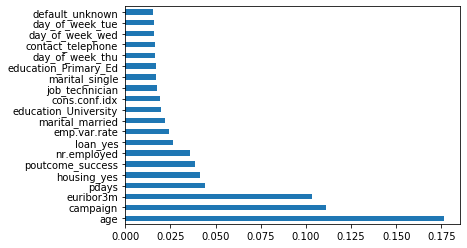

In [477]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)

print(model.feature_importances_) 

important_features = pd.Series(model.feature_importances_, index=x.columns)
important_features.nlargest(20).plot(kind='barh' )
plt.show()

In [478]:
important_features.nlargest(20)

age                     0.176432
campaign                0.111135
euribor3m               0.103228
pdays                   0.044125
housing_yes             0.041356
poutcome_success        0.038706
nr.employed             0.035967
loan_yes                0.026416
emp.var.rate            0.024142
marital_married         0.021854
education_University    0.019771
cons.conf.idx           0.019133
job_technician          0.017767
marital_single          0.016963
education_Primary_Ed    0.016865
day_of_week_thu         0.016360
contact_telephone       0.016229
day_of_week_wed         0.015964
day_of_week_tue         0.015668
default_unknown         0.015518
dtype: float64

In [490]:
cols2=['age','campaign','euribor3m','pdays','housing_yes','poutcome_success','nr.employed','loan_yes','emp.var.rate',
    'marital_married','education_University','cons.conf.idx','job_technician','marital_single',
      'education_Primary_Ed','day_of_week_thu','contact_telephone' ,'day_of_week_wed','day_of_week_tue','default_unknown']

ExtraTree Classifier has given us the following variables:'age','campaign','euribor3m','pdays','housing_yes','poutcome_success','nr.employed','loan_yes','emp.var.rate',
    'marital_married','education_University','cons.conf.idx','job_technician','marital_single',
      'education_Primary_Ed','day_of_week_thu','contact_telephone' ,'day_of_week_wed','day_of_week_tue','default_unknown'

In [491]:
X2= x[cols2]

In [492]:
X2

,age,campaign,euribor3m,pdays,housing_yes,poutcome_success,nr.employed,loan_yes,emp.var.rate,marital_married,education_University,cons.conf.idx,job_technician,marital_single,education_Primary_Ed,day_of_week_thu,contact_telephone,day_of_week_wed,day_of_week_tue,default_unknown
0,56,1,4.857,999,0,0,5191.0,0,1.1,1,0,-36.4,0,0,1,0,1,0,0,0
1,57,1,4.857,999,0,0,5191.0,0,1.1,1,0,-36.4,0,0,0,0,1,0,0,1
2,37,1,4.857,999,1,0,5191.0,0,1.1,1,0,-36.4,0,0,0,0,1,0,0,0
3,40,1,4.857,999,0,0,5191.0,0,1.1,1,0,-36.4,0,0,1,0,1,0,0,0
4,56,1,4.857,999,0,0,5191.0,1,1.1,1,0,-36.4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,1.028,999,1,0,4963.6,0,-1.1,1,0,-50.8,0,0,0,0,0,0,0,0
41184,46,1,1.028,999,0,0,4963.6,0,-1.1,1,0,-50.8,0,0,0,0,0,0,0,0
41185,56,2,1.028,999,1,0,4963.6,0,-1.1,1,1,-50.8,0,0,0,0,0,0,0,0
41186,44,1,1.028,999,0,0,4963.6,0,-1.1,1,0,-50.8,1,0,0,0,0,0,0,0


## Logistic Regression Model Fitting

With all the features

In [505]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import KFold
#split on all features
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Checking data split

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28831, 49)
(28831, 1)
(12357, 49)
(12357, 1)


In [508]:
def Perform_Logistic_Regression(X_train, X_test, y_train, y_test):
    #train the LR model
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    y_train_pred = logreg.predict(X_train)
    #predict test data 
    y_test_pred = logreg.predict(X_test)

# #test data predition accuracy Score 
    print('Test Accuracy Score',accuracy_score(y_test, y_test_pred))
    print("Train Accuracy Score:",accuracy_score(y_train, y_train_pred))
    
    print('Report:\n',classification_report(y_test, y_test_pred))
    print("F1 Score:",f1_score(y_test_pred,y_test))
    print(confusion_matrix(y_test, y_test_pred))
    pl.matshow(confusion_matrix(y_test, y_test_pred))
    pl.title('Confusion matrix of the classifier')
    pl.colorbar()
    pl.show()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test Accuracy Score 0.897952577486445
Train Accuracy Score: 0.9000034684887794
Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.94     10969
           1       0.66      0.19      0.30      1388

    accuracy                           0.90     12357
   macro avg       0.78      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357

F1 Score: 0.2967094255437813
[[10830   139]
 [ 1122   266]]


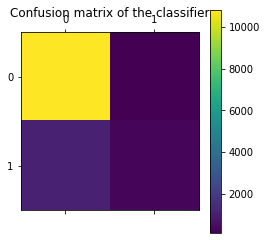

In [509]:
Perform_Logistic_Regression(X_train, X_test, y_train, y_test)

* Accuracy score is the percentage of correct predictions out of all predictions made. The LR algorithm achieves a test accuracy of 89.79% with all the features, suggesting high level of strength of this model to classify the customer response given all the defined features.

* From the confusion matrix we have 10830, 139 correct predictions and 1122, 266 incorrect predictions.
* 1122 tests (False negative) predicted the bank’s client would subscribe to the term deposit but they actually did not
* Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 91%.Te LR classifier can classify people who are more likely to say no

#### Logistic regression with RFE  selected features 
* cols= 'month_may','poutcome_nonexistent','default_unknown','month_dec', 
       'month_jul', 'month_jun','job_student', 'job_services','month_mar', 'job_retired', 
       'poutcome_success','contact_telephone','job_blue-collar','month_aug',
       'euribor3m', 'education_unknown','day_of_week_mon', 'previous', 'month_oct', 'month_sep'

In [512]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
# from sklearn.model_selection import KFold

#selected columns from X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=16)

# Checking data split

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28831, 20)
(28831, 1)
(12357, 20)
(12357, 1)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy Score 0.8981144290685441
Train Accuracy Score: 0.900142208039957
Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.94     10934
           1       0.70      0.21      0.32      1423

    accuracy                           0.90     12357
   macro avg       0.80      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357

F1 Score: 0.3168746608790017
[[10806   128]
 [ 1131   292]]


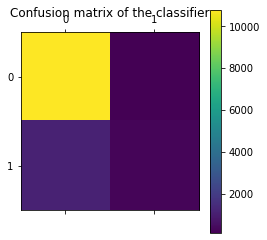

In [513]:
Perform_Logistic_Regression(X_train, X_test, y_train, y_test)

* The LR algorithm with RFE selected features without duration achieves a test accuracy of 89.81%
* From the confusion matrix we have 10806, 292 correct predictions and 1131,292 incorrect predictions.
* 1131 tests (False negative) predicted the bank’s client would subscribe to the term deposit but they actually did not. There seems to be a higher false negative with th eselected variables
* Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 91%.Te LR classifier can classify people who are more likely to say no

#### Logistic regression with  ExtraTreesClassifier selected features  
* cols2='age','campaign','euribor3m','pdays','housing_yes','poutcome_success','nr.employed','loan_yes','emp.var.rate',
    'marital_married','education_University','cons.conf.idx','job_technician','marital_single',
      'education_Primary_Ed','day_of_week_thu','contact_telephone' ,'day_of_week_wed','day_of_week_tue','default_unknown

In [528]:
#selected columns from X2
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=26)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Test Accuracy Score 0.8976288743222465
Train Accuracy Score: 0.897367417016406
Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     10949
           1       0.68      0.19      0.30      1408

    accuracy                           0.90     12357
   macro avg       0.79      0.59      0.62     12357
weighted avg       0.88      0.90      0.87     12357

F1 Score: 0.2991689750692521
[[10822   127]
 [ 1138   270]]


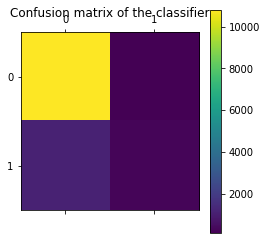

In [529]:
Perform_Logistic_Regression(X_train, X_test, y_train, y_test)

* The LR algorithm with ExtraTreesClassifier selected features achieves an accuracy of 89.9%
* RFE Selected features have a slightly higher accuracy 

## Random Forest

With all the features

In [516]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [518]:
def Perform_Random_Forest(X_train, X_test, y_train, y_test):
    #train the RF model
    rfc = RandomForestClassifier(n_estimators=20,max_depth=5, random_state=15,max_leaf_nodes=50)
    
    rfc.fit(X_train,y_train)
    #predit 
    y_train_pred2 = rfc.predict(X_train)
    y_test_pred2 = rfc.predict(X_test)

# #test data predition accuracy Score 
    print('Accuracy Test Score',accuracy_score(y_test, y_test_pred2))
    print('Accuracy Train Score',accuracy_score(y_train, y_train_pred2))
    print('Report:\n',classification_report(y_test, y_test_pred2))
    print("F1 Score:",f1_score(y_test_pred2,y_test))
    print(confusion_matrix(y_test, y_test_pred2))
    pl.matshow(confusion_matrix(y_test, y_test_pred2))
    pl.title('Confusion matrix of the classifier')
    pl.colorbar()
    pl.show()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy Test Score 0.8943109168892126
Accuracy Train Score 0.9021192466442371
Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     10910
           1       0.70      0.17      0.28      1447

    accuracy                           0.89     12357
   macro avg       0.80      0.58      0.61     12357
weighted avg       0.88      0.89      0.86     12357

F1 Score: 0.2768549280177187
[[10801   109]
 [ 1197   250]]


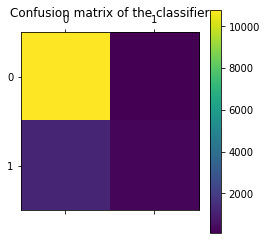

In [519]:
Perform_Random_Forest(X_train, X_test, y_train, y_test)

* The RF algorithm achieves a test accuracy of 89.4% with all the features, suggesting high level of strength of this model to classify the customer response given all the defined features.

* From the confusion matrix we have 10801, 250 correct predictions and 1197, 109 incorrect predictions.

* 1197 tests (False negative) predicted the bank’s client would subscribe to the term deposit but they actually did not
* Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 90%.The RF classifier can classify people who are more likely to say no

### Random Forest with RFE selected features
* cols= 'month_may','poutcome_nonexistent','default_unknown','month_dec',
 'month_jul', 'month_jun','job_student', 'job_services','month_mar', 'job_retired', 
 'poutcome_success','contact_telephone','job_blue-collar','month_aug',
 'euribor3m', 'education_unknown','day_of_week_mon', 'previous', 'month_oct', 'month_sep'

In [522]:
#selected columns from X
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy Test Score 0.8990046127700898
Accuracy Train Score 0.8991363462939197
Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95     10958
           1       0.74      0.17      0.27      1399

    accuracy                           0.90     12357
   macro avg       0.82      0.58      0.61     12357
weighted avg       0.88      0.90      0.87     12357

F1 Score: 0.2718786464410735
[[10876    82]
 [ 1166   233]]


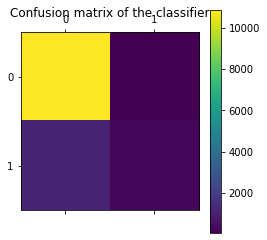

In [523]:
Perform_Random_Forest(X_train, X_test, y_train, y_test)

 The Random Forest algorithm with RFE selecetd features achieves an accuracy of 89.9%, suggesting high level of strength of this model to classify the customer response given all the defined features.

#### Random forest with ExtraTreesClassifier selected features
cols2='age','campaign','euribor3m','pdays','housing_yes','poutcome_success','nr.employed','loan_yes','emp.var.rate', 'marital_married','education_University','cons.conf.idx','job_technician','marital_single',
'education_Primary_Ed','day_of_week_thu','contact_telephone' ,'day_of_week_wed','day_of_week_tue','default_unknown

In [526]:
#selected columns from X2
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=1)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Accuracy Test Score 0.8964149874565024
Accuracy Train Score 0.9012868093371718
Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     10944
           1       0.69      0.17      0.27      1413

    accuracy                           0.90     12357
   macro avg       0.80      0.58      0.61     12357
weighted avg       0.88      0.90      0.87     12357

F1 Score: 0.27189988623435724
[[10838   106]
 [ 1174   239]]


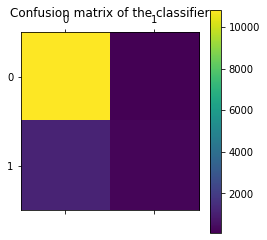

In [527]:
Perform_Random_Forest(X_train, X_test, y_train, y_test)

* The RF algorithm with ExtraTreesClassifier selected features achieves an accuracy of 89.64%
* RFE Selected features have a slightly higher accuracy than ExtraTreesClassifier selected features

### Results

In [532]:

model_names = ['Logistic Regression with all', 'Logistic Regression with Selected', 'Random Forest with All','Random Forest with Selected']
accuracy_value_test = [0.8976,0.8981,0.8942,0.8990,]
accuracy_value_train = [0.900,0.900,0.8994,0.902]

results = pd.DataFrame({"Model Name":model_names, "Test Accuracy":accuracy_value_test, "Train Accuracy":accuracy_value_train})
results

,Model Name,Test Accuracy,Train Accuracy
0,Logistic Regression with all,0.8976,0.9000
1,Logistic Regression with Selected,0.8981,0.9000
2,Random Forest with All,0.8942,0.8994
3,Random Forest with Selected,0.8990,0.9020


### Conclusion

* Looking at the above table, we can see that Random forest with important selected features performed the best and gave better accuracy compared to all.
* We should go with Random Forest with important features as our final model as it has a better F1 score, Accuracy & Confusion Matrix
* We see that from the following parameters related to a target customer we were able to predict customers' response to the term deposit campaign.
'age','campaign','euribor3m','pdays','housing_yes','poutcome_success','nr.employed','loan_yes','emp.var.rate', 'marital_married','education_University','cons.conf.idx','job_technician','marital_single'
* We see that customer's age affects campaign outcome as well. Future campains should concentrate on customers between 30 - 48 years old. 
* Number of calls with the customer during the campaign is also important. Bank should avoid calling clients more than 6 times as it could lead to customer dissatisfaction. 